In [1]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os; import sys
import numpy as np
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
# MPC import
from LinearMPC.MPCVelControl import MPCVelControl
from PIControl.PIControl import PIControl

from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis, plot_static_states_inputs

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

##### Must replace "raise ValueError("State or input constraints violated")" in rocket.py l.423 with 
##### "print(f"State or input constraints violated,\t Alpha = {x0[3]},\t Beta = {x0[4]}")" to run and see the extent of the contraint violation

In [3]:
Ts = 0.05
sim_time = 15
H = 5.0
x0 = np.array([0, 0, 0, 0, 0, 0, 5, 5, 10, 0, 0, 1])  # initial state
x_target = np.zeros((12,))

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

# Static mass change and zero fuel rate
rocket.mass = 1.5
rocket.fuel_rate = 0.0
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, ref = rocket.simulate_control(
    mpc, sim_time, H, x0, x_target=x_target, method="nonlinear"
)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

State or input constraints violated,	 Alpha = 10.00773855561037,	 Beta = -9.961903794980602
State or input constraints violated,	 Alpha = 10.038389420458874,	 Beta = -10.022221098802824
State or input constraints violated,	 Alpha = 10.02224159711822,	 Beta = -10.031046859995998
State or input constraints violated,	 Alpha = 9.999726243744677,	 Beta = -10.012510015877373
State or input constraints violated,	 Alpha = 10.001908273010248,	 Beta = -9.999044890796235
State or input constraints violated,	 Alpha = 10.004684276199876,	 Beta = -10.003132258721482
State or input constraints violated,	 Alpha = 10.00384

In [4]:
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl, Ref=ref[:,:-1], T_ol=t_ol[...,:-1], X_ol=x_ol, U_ol=u_ol); 

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=299, step=2), IntSlider(value=0…

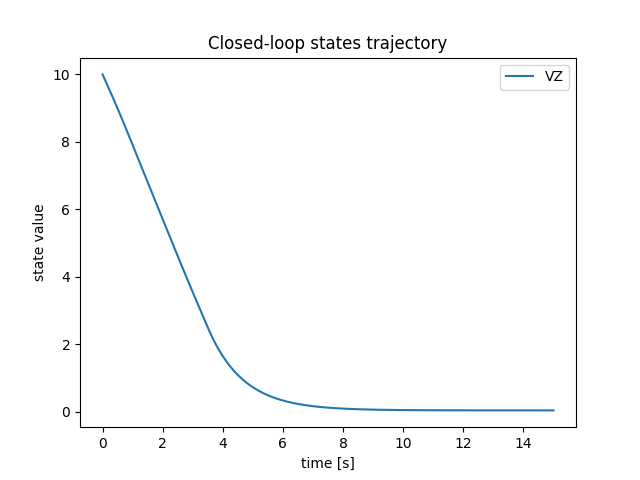

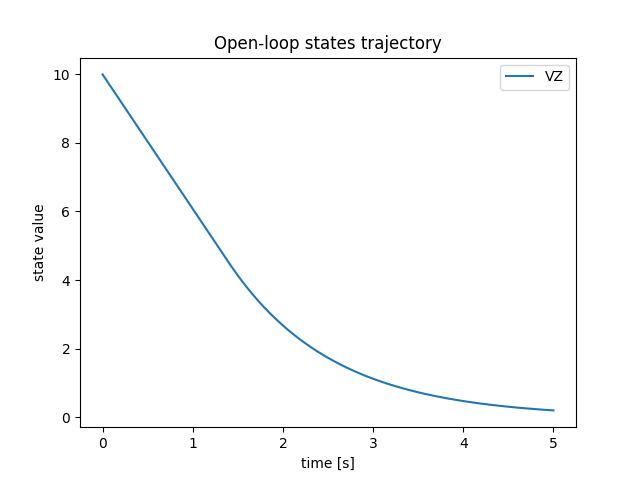

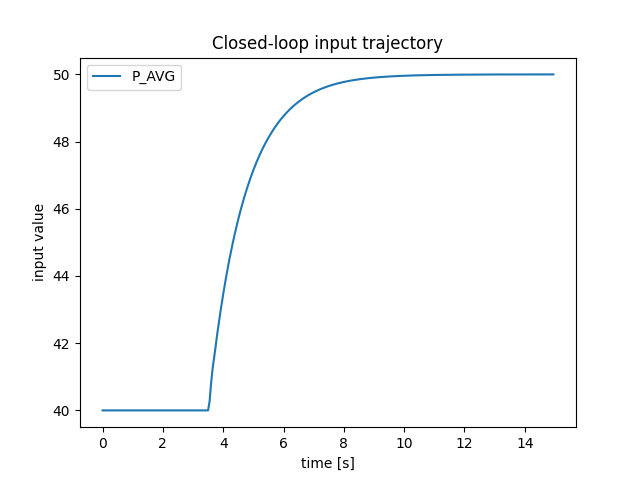

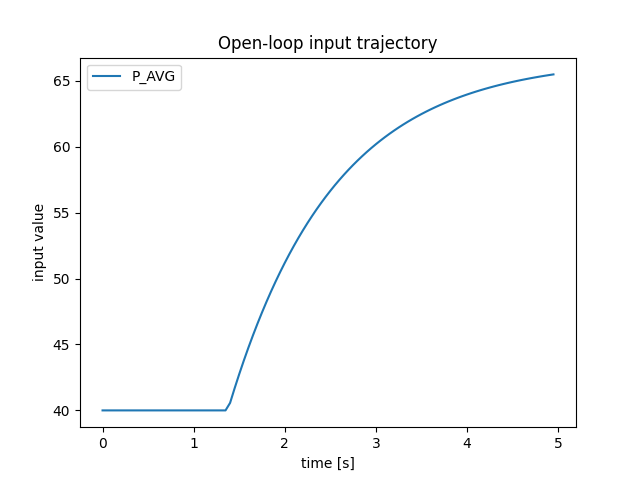

In [5]:
from LinearMPC.utils import plot_trajectory
plot_trajectory(t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, mpc.mpc_z)